# 7. 분할정복

## 기본개념 및 문제

### 1. 가장 가까운 값 찾기

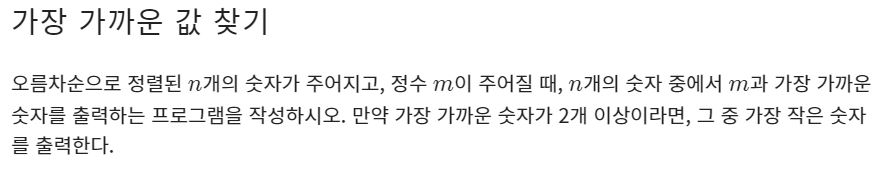

In [13]:
from IPython.display import Image
 
Image("3장_가장 가까운 값 찾기.jpg")

In [14]:
import sys

def getNearestInternal(data,m):
	'''
	m과 가장 가까운 값 후보인 두 값을 리턴하는 함수
	'''
    #기저사례
	if len(data)==1:
		return(data[0],data[0])
	elif len(data)==2:
		return(data[0],data[1])
    #중간값찾기
    mid = len(data)//2
	if data[mid] <= m:
		return getNearestInternal(data[mid:],m)
	else:
		return getNearestInternal(data[:mid+1],m)

def getNearest(data, m):
	'''
	n개의 숫자가 list로 주어지고, 숫자 m이 주어질 때, n개의 숫자 중에서 m과 가장 가까운 숫자를 반환하는 함수를 작성하세요.
	'''
	
	value = getNearestInternal(data,m)
    '''
	value[0]: m 이하이면서 가장 가까운 값
	value[1]: m 이상이면서 가장 가까운 값
    '''
    #둘 중 더 가까운 값 찾기
	if (m - value[0])<=(value[1] - m) :
		return value[0]
	else:
		return value[1]

def main():
    data = [int(x) for x in input().split()]
    m = int(input())

    print(getNearest(data, m))

if __name__ == "__main__":
    main()

1 4 6 7 10 14 16
12
10


### 2. 거듭제곱 구하기

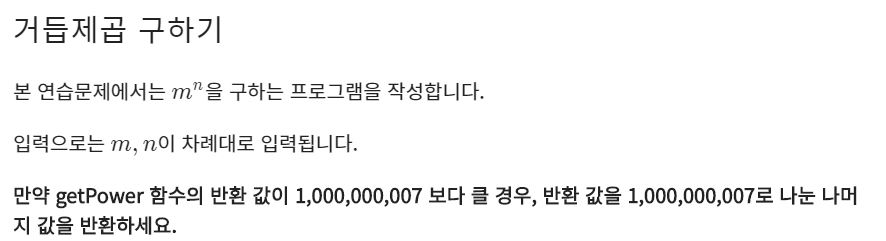

In [15]:
from IPython.display import Image
Image("3장_거듭제곱구하기.jpg")

In [2]:
LIMIT_NUMBER = 1000000007

def getPower(m, n):
	'''
	m^n 을 LIMIT_NUMBER로 나눈 나머지를 반환하는 함수를 작성하세요.
	'''
    #기저사례
    if n==0:
		return 1
	elif n%2==0:
		temp=getPower(m,n//2)
		return (temp*temp)%LIMIT_NUMBER
	else:
		temp = getPower(m,(n-1)//2)
		return ((temp*temp)*m) % LIMIT_NUMBER


def main():
    myList = [int(v) for v in input().split()]

    print(getPower(myList[0], myList[1]))

if __name__ == "__main__":
    main()


3 4
81


### 3. 합병정렬

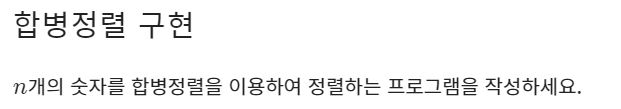

In [19]:
from IPython.display import Image
 
Image("3장_합병정렬.jpg")

In [12]:
import sys
import math

def mergeSort(data) :
    '''
    n개의 숫자를 합병정렬을 이용하여 정렬한 결과를 list로 반환하는 함수를 작성하세요.
    '''
    # 기저사례
    if len(data)==1:
        return data
    mid=len(data)//2
    
    #합병정렬한 결과
    left =mergeSort(data[:mid])
    right =mergeSort(data[mid:])
   
    result=[]
    
    leftPtr=0
    rightPtr=0
    
    while leftPtr<len(left) or rightPtr<len(right):
        # out of range시에 inf처리
        leftValue=left[leftPtr] if leftPtr<len(left) else math.inf
        rightValue=right[rightPtr] if rightPtr<len(right) else math.inf
        
        #두 값 중 작은 값 추출
        if leftValue<rightValue:
            result.append(leftValue)
            leftPtr +=1
        else:
            result.append(rightValue)
            rightPtr +=1
    return result


def main():
    data = [int(x) for x in input().split()]

    print(*mergeSort(data))

if __name__ == "__main__":
    main()

    

1 5 6 2 3 8 4 9 7 10
1 2 3 4 5 6 7 8 9 10


### 4. 연속 부분 최대 합

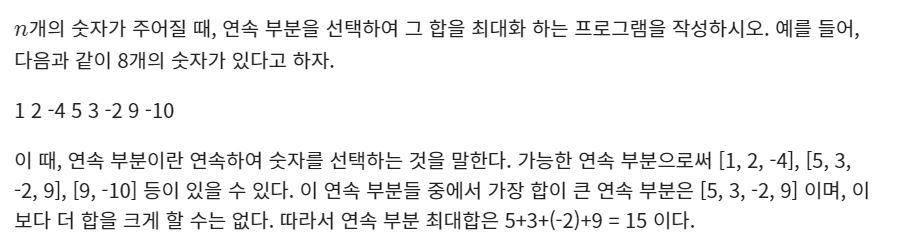

In [23]:
from IPython.display import Image
 
Image("3장_연속부분최대합.jpg")

In [19]:
import sys

def getSubsum(data) :
    '''
    n개의 숫자가 list로 주어질 때, 그 연속 부분 최대합을 반환하는 함수를 작성하세요.
    '''
    n=len(data)
    if n==1:
        return data[0]
    '''
    왼쪽, 오른쪽, 양쪽의 최대 합 중 가장 큰 값
    '''
    mid=n//2
    left = getSubsum(data[:mid])
    right = getSubsum(data[mid:])
    
    Sum = 0
    leftSum = 0
    rightSum = 0
    
    #하나씩 작아지는 값(왼쪾방향)
    for i in range(mid-1,-1,-1):
        Sum +=data[i]
        leftSum = max(Sum, leftSum)
    
    Sum=0
    for i in range(mid,n):
        Sum +=data[i]
        rightSum = max(Sum, rightSum)
    return max([left, right, leftSum+rightSum])
   

def main():

    data = [int(x) for x in input().split()]

    print(getSubsum(data))

if __name__ == "__main__":
    main()


1 2 -4 5 3 -2 9 -10
15
